In [221]:
def fibonacci(n):
    '''fibonacci using recursion, takes time'''
    if n >= 0:
        if n == 0:
            return 1
        if n == 1:
            return 1
        return fibonacci(n-2) + fibonacci(n-1)  

In [222]:
def fibonacci_iter(n):
    '''fibonacci but instead of recursion it uses exchange of naighbor elements and their sum'''
    
    if n >= 0:
        if n == 0:
            return 1
        if n == 1:
            return 1
        a, b = 0, 1
        for i in range(1, n+1):
            a, b = b, a+b
        return b     

In [223]:
def fibonacci_back(n, memo={}):
    '''fibonacci but instead of recursion it uses a backtrack of the last fibonacci'''
    
    if n >= 0:
        if n == 0:
            return 1
        if n == 1:
            return 1
        elif n in memo:
            return memo[n]
        else:
            memo[n] = fibonacci_back(n-1) + fibonacci_back(n-2)
            return memo[n]

In [224]:
fibonacci(4)

5

In [225]:
fibonacci_iter(4)

5

In [270]:
fibonacci_back(45)

1836311903

In [264]:
def calc_time(func,n=10):
    
    result = []
    for i in range(n+1):
        to_append = %timeit -n 1 -r 1 -q -o -p 6 func(i) 
        result.append(to_append.best * 1e6)
    return result

In [228]:
import pandas as pd

In [229]:
def create_data(n):
    data = pd.DataFrame()
    for func in [fibonacci, fibonacci_iter, fibonacci_back]:
        data[str(func)] = calc_time(func,n)
    data.columns = ['recursive','iterative','memorizing']
    return data

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

In [266]:
data = create_data(30)

In [260]:
data.head()

,recursive,iterative,memorizing
0,0.01626,0.01844,0.01759
1,0.01569,0.01546,0.01665
2,0.02087,0.03680,0.02442
3,0.02546,0.03592,0.02162
4,0.03198,0.03335,0.02204


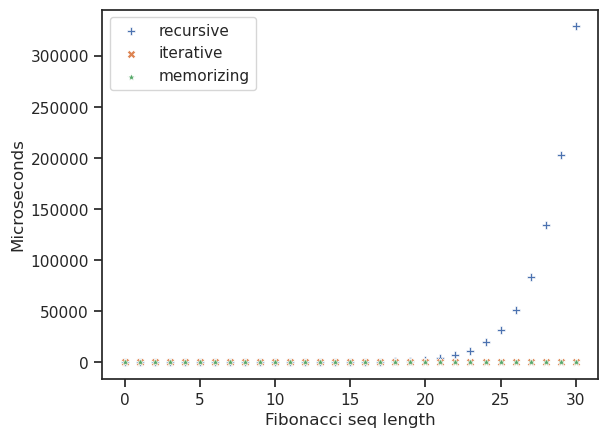

In [268]:
sns.set_style('ticks')
ax = sns.scatterplot(data, x = data.index, y = 'recursive', marker = 'P')
sns.scatterplot(data, x = data.index, y = 'iterative', marker = 'X', ax = ax)
sns.scatterplot(data, x = data.index, y = 'memorizing', marker = '*', ax = ax)
plt.ylabel('Microseconds')
plt.xlabel('Fibonacci seq length')
plt.legend(['recursive','iterative','memorizing'])
plt.savefig('fibonacci_30.jpg',dpi=600)